In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [16]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [ ]:
img_width = 180
img_height = 180 

In [18]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [19]:
data_cat = data_train.class_names

In [20]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [22]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


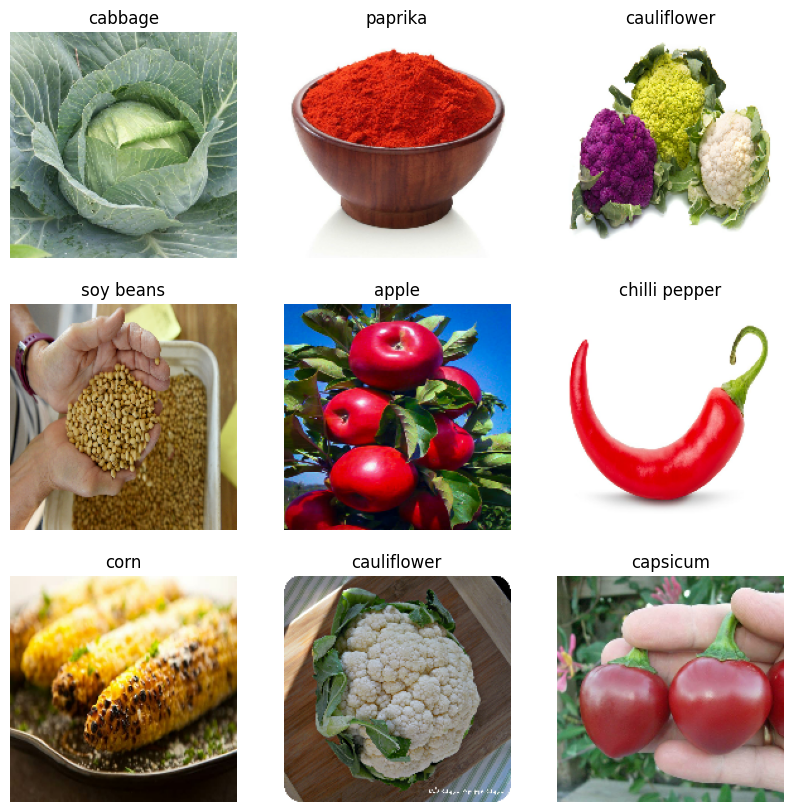

In [23]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [27]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 253ms/step - accuracy: 0.0793 - loss: 3.6288 - val_accuracy: 0.4103 - val_loss: 2.1782
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.3179 - loss: 2.4072 - val_accuracy: 0.6040 - val_loss: 1.3654
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.5131 - loss: 1.6981 - val_accuracy: 0.8775 - val_loss: 0.7335
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.7040 - loss: 1.0592 - val_accuracy: 0.9117 - val_loss: 0.4712
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.8336 - loss: 0.6359 - val_accuracy: 0.9231 - val_loss: 0.3753
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.9005 - loss: 0.3982 - val_accuracy: 0.9345 - val_loss: 0.3257
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.9229 - loss: 0.3235 - val_accuracy: 0.9601 - val_loss: 0.3526
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.9520 - loss: 0.2041 - val_accu

Text(0.5, 1.0, 'Loss')

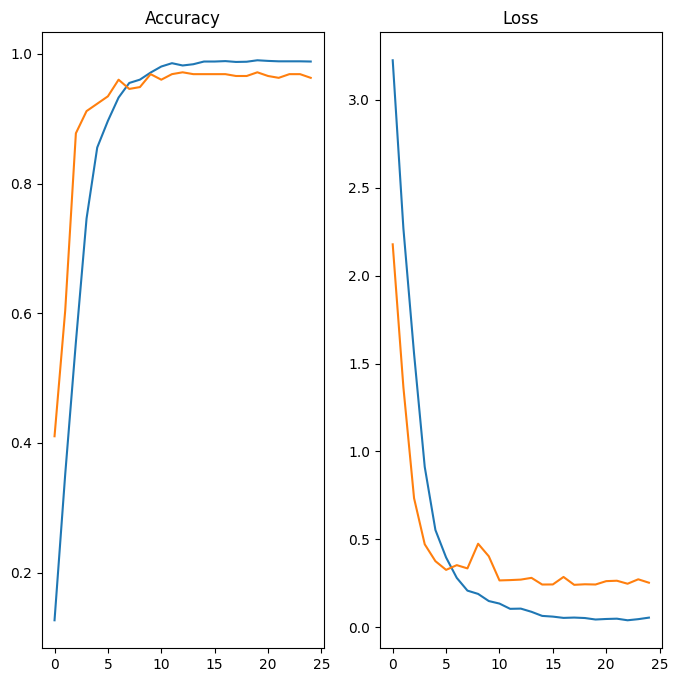

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [30]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [31]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [32]:
score = tf.nn.softmax(predict)

In [33]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 92.79


In [34]:
model.save('Image_classify.keras')